## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### <span style="color:red"> H(x) = aX + b 에서처럼, F = C*1.8 +32  </span>
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
<u><span style="color:red">[Chain Rule 증명](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1b/a/proving-the-chain-rule) </span></u>

### Configuration (or prerequisite)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

####  <span style="color:blue">선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성</span>
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

In [2]:
'''
섭씨온도 데이터를 담고있는 C의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
C의 첫 10개 값을 확인합니다. 
'''

np.random.seed(0)
C = np.random.randint(0,100)
C 

C = np.random.randint(0,100, size=100)
C 

C = np.random.randint(low = 0, size= 100 , high=100)
C 

array([69, 41, 35, 64, 95, 69, 94,  0, 50, 36, 34, 48, 93,  3, 98, 42, 77,
       21, 73,  0, 10, 43, 58, 23, 59,  2, 98, 62, 35, 94, 67, 82, 46, 99,
       20, 81, 50, 27, 14, 41, 58, 65, 36, 10, 86, 43, 11,  2, 51, 80, 32,
       54,  0, 38, 19, 46, 42, 56, 60, 77, 30, 24,  2,  3, 94, 98, 13, 40,
       72, 19, 95, 72, 26, 66, 52, 67, 61, 14, 96,  4, 67, 11, 86, 77, 75,
       56, 16, 24, 29, 21, 25, 80, 60, 61, 83, 33, 32, 70, 85, 31])

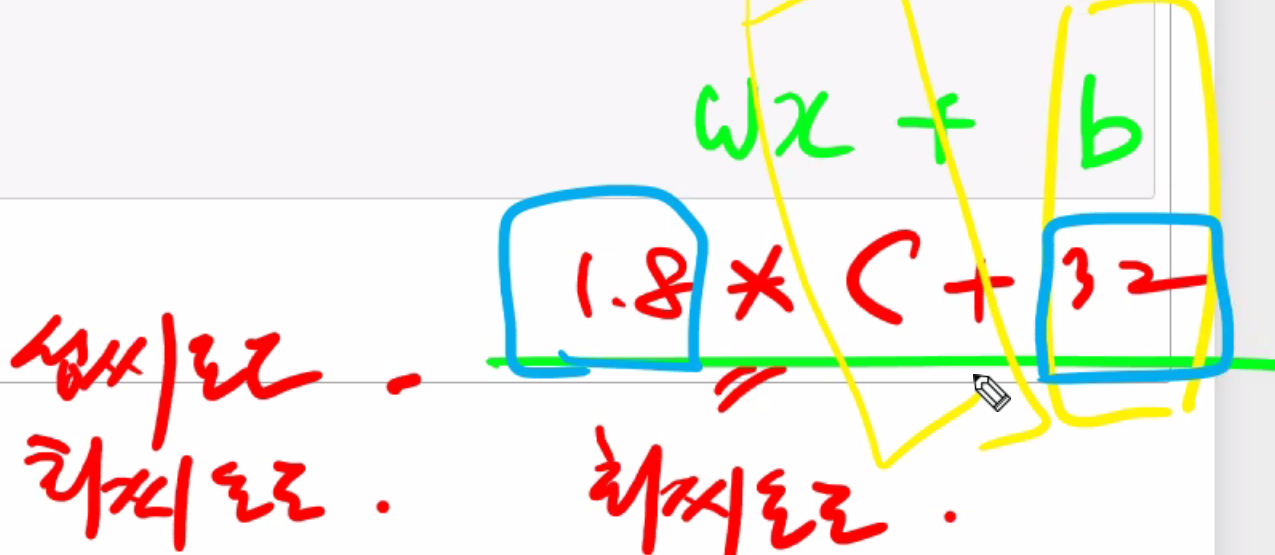

In [3]:
# 섭씨 온도에 1.8을 곱하고 32를 더하면 화씨온도.
# Wx + b (W = 1.8,x = C ,b = 32 ) 를 말한다.
print(C.shape)
C[:10]

(100,)


array([69, 41, 35, 64, 95, 69, 94,  0, 50, 36])

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### <span style="color:blue">우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성.</span> 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.  
# 목표 = weight값과 bias값을 찾아내는것

### Bias (편향 찾기) -- Weight는 1.8
    값을 찾아내는 방법은 둘다 똑같다.

####  <span style="color:blue">Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.</span>

In [4]:
F = 1.8 * C + 32
F[:10]

array([156.2, 105.8,  95. , 147.2, 203. , 156.2, 201.2,  32. , 122. ,
        96.8])

### Visualization

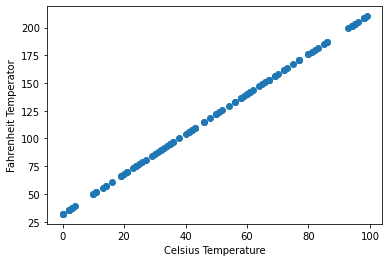

In [5]:
plt.scatter(C,F)
plt.xlabel('Celsius Temperature')
plt.ylabel('Fahrenheit Temperator')
plt.show()

    X를 넣으면 Y의 값이 변동된다.

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
####  <span style="color:red">이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.</span>
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [6]:
# 섭씨온도 = X
# 화씨온도 = Y
X = C
Y = F

In [7]:
w = 1.8

# bias에 학습이 가능한 정규 값을 넣어주자 
b = np.random.uniform(low=-1.0, high=1.0)# 사이의 값에서 랜덤값이 나온다.
w, b

(1.8, 0.3203470749853701)

### Predict

In [8]:
y_predict = w*X + b

In [9]:
y_predict[:10]

array([124.52034707,  74.12034707,  63.32034707, 115.52034707,
       171.32034707, 124.52034707, 169.52034707,   0.32034707,
        90.32034707,  65.12034707])

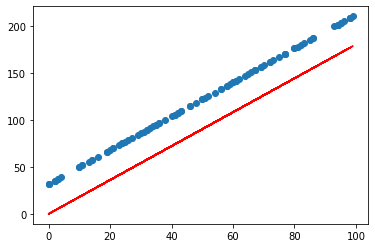

In [10]:
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')
plt.show()

    파란선은 실제 값, 빨간선은 예측값이다.
    cost function으로 정량화를 시켜야 한다.

bias 값 찾기

In [11]:
b = b-(y_predict-Y).mean()
b

32.0

In [12]:
y_predict = w*C+b
y_predict[:10]

array([156.2, 105.8,  95. , 147.2, 203. , 156.2, 201.2,  32. , 122. ,
        96.8])

bias값 맞는지 확인해보기

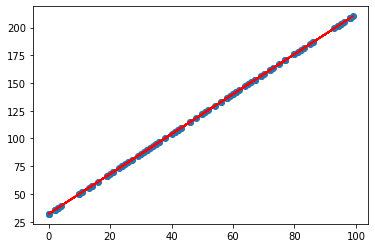

In [13]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')
plt.show()

#### <span style="color:blue">선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.</span>

# 둘다 모르는 상태에서 작업하기.
w, b값 찾아보기

In [14]:
w = np.random.uniform(-1.0, 1.0)
b = np.random.uniform(-1.0, 1.0)

In [15]:
w,b

(-0.41984478557911187, 0.23603085799768309)

### 1. 선형으로 만들어 보기

In [16]:
y_predict = w*X+b
y_predict[:10]

array([-28.73325935, -16.97760535, -14.45853664, -26.63403542,
       -39.64922377, -28.73325935, -39.22937899,   0.23603086,
       -20.75620842, -14.87838142])

### 2. 시각화 해보기

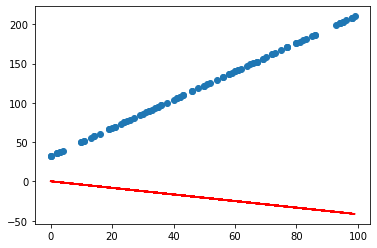

In [17]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')

### 3. Gradient Descent
##### 가중치(weight), 편향(bias)
Cost Function을 알아야 Gradient Descent를 할 수 있다.

기계학습에서 한 Epoch란 훈련 데이터셋에 포함되어 있는 모든 데이터값들이 각각 한번씩 예측 모델에 들어온 뒤 weight 값을 갱신하는 주기를 의미합니다

In [23]:
# num_epoch에 몇번 반복할지 지정해준다.
# 1회 학습이 끝나면 w,b값이 나오고 cost값이 도출된다.
# 그렇게되면 얼마 만큼 기울기를 수정해야 할지 정해진다.
# 그리고 나서 2회....a회의 학습이 반복적으로 진행된다
# cost값이 0에 가까워지면 학습을 멈추도록 로직을 작성할 것이다.
num_epoch = 100000

# 학습의 속도를 결정하는 learning_rate은 마지막에 기울기 값이 낮아지면 속도를 줄여서 
# 정밀하게 검사해야 한다.
learning_rate = 0.0003 # 수동적으로 돌려서 값을 알아봐야한다.

w = np.random.uniform(-1.0, 1.0)
b = np.random.uniform(-1.0, 1.0)

for epoch in range(num_epoch):
    y_predict = w * X + b # 1.우선 선형을 하나 만든다.
    
    # 얼마나 예측을 잘 했는지에 대한 정량화된 값을 구한다. MSE(pred_Y)**2
    # 예측값(H(x))과 실제값을 넣어준다.
    #loss = np.abs(y_predict - Y).mean()
    loss = ((y_predict - Y)**2).mean()
    
    if loss<0.1 : # 0에 가까워 지면 반복문을 나옴.
        break
    else:
        # 계속적으로 학습을 진행하는데 w, b값을 업데이트 해준다는 의미이다.
        # 간격을 점점 좁혀준다  한다.
        w = w-learning_rate*((y_predict - Y)*X).mean()
        b = b-learning_rate*(y_predict - Y).mean() # 하이퍼 파라미터 learning_rate
    
        if epoch % 10000 == 0:
            print(f'epoch = {epoch:5}, w = {w: .3f}, b = {b: .3f}, loss = {loss:.3f}')
print('------------------------------------------------------------------')
print(f'epoch = {epoch:5}, w = {w: .3f}, b = {b: .3f}, loss = {loss:.3f}')

epoch =     0, w =  2.218, b =  0.182, loss = 14516.007
epoch = 10000, w =  2.021, b =  17.424, loss = 55.304
epoch = 20000, w =  1.901, b =  25.322, loss = 11.607
epoch = 30000, w =  1.846, b =  28.941, loss = 2.436
epoch = 40000, w =  1.821, b =  30.598, loss = 0.511
epoch = 50000, w =  1.810, b =  31.358, loss = 0.107
------------------------------------------------------------------
epoch = 50452, w =  1.809, b =  31.380, loss = 0.100


In [19]:
num_epoch = 100000
learning_rate = 0.0003

w = np.random.uniform(-1.0, 1.0)
b = np.random.uniform(-1.0, 1.0)

for epoch in range(num_epoch):
    y_predict = w*X + b
    loss = ((y_predict - Y)**2).mean()
    
    if(loss < 0.1):
        break
    else:
        w = w - learning_rate * ((y_predict - Y)*X).mean()
        b = b - learning_rate * (y_predict - Y).mean()
        
        if epoch % 10000 == 0:
            print(f'EPOCH: {epoch} w: {round(w,3)}, b: {round(b,3)}, loss={round(loss,3)}')
print('-'*50)
print(f'EPOCH: {epoch} w: {round(w,3)}, b: {round(b,3)}, loss={round(loss,3)}')


EPOCH: 0 w: 2.2, b: 0.182, loss=23567.022
EPOCH: 10000 w: 2.021, b: 17.424, loss=55.303
EPOCH: 20000 w: 1.901, b: 25.322, loss=11.607
EPOCH: 30000 w: 1.846, b: 28.941, loss=2.436
EPOCH: 40000 w: 1.821, b: 30.598, loss=0.511
EPOCH: 50000 w: 1.81, b: 31.358, loss=0.107
--------------------------------------------------
EPOCH: 50452 w: 1.809, b: 31.38, loss=0.1


In [20]:
y_predict = w*C+b
y_predict[:5]

array([156.22734297, 105.56471111,  94.70843285, 147.18044443,
       203.27121542])

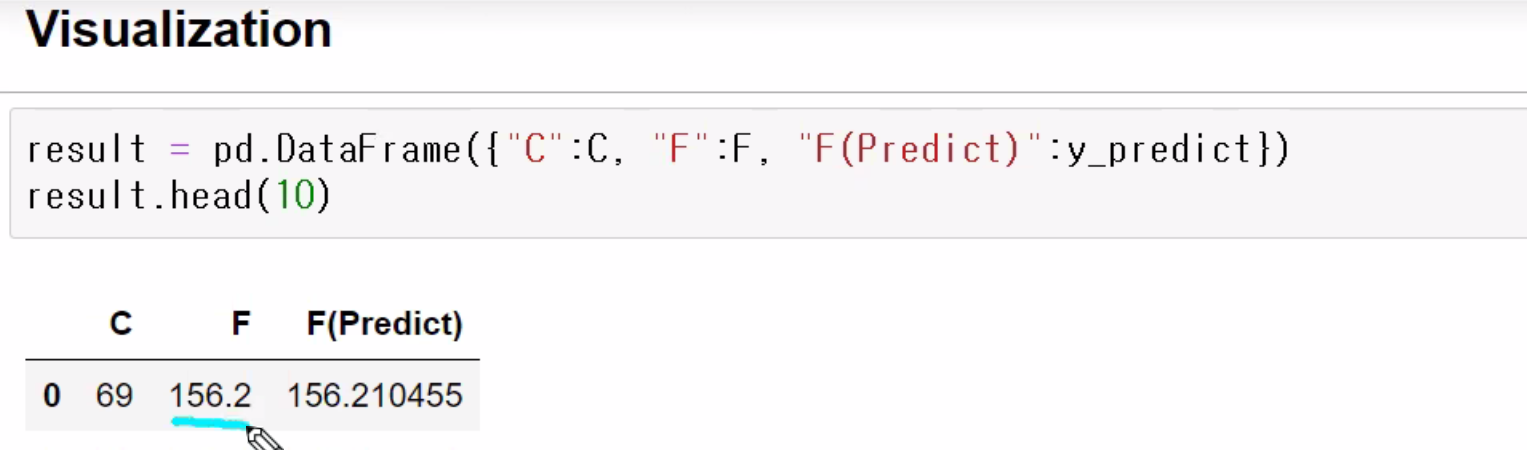

### 4. Visualization

In [21]:
result = pd.DataFrame({'C':C, 'F':F,'F(Predict)':y_predict})
result.head(10)

,C,F,F(Predict)
0,69,156.2,156.227343
1,41,105.8,105.564711
2,35,95.0,94.708433
3,64,147.2,147.180444
4,95,203.0,203.271215
5,69,156.2,156.227343
6,94,201.2,201.461836
7,0,32.0,31.380143
8,50,122.0,121.849128
9,36,96.8,96.517813


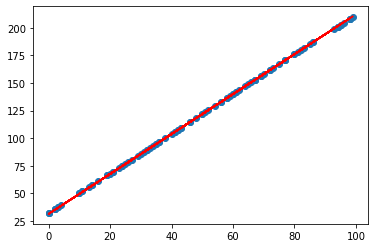

In [22]:
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')